# Save Preprocessed Data
---

### 개요
* Preprocess 처리 얻은 **preprocessed_data를 저장**하여, 매 분석을 실행할 때마다 preprocessing 해야할 필요성을 제거함

---
* 아래는 지정된 경로에 있는 data들을 preprocessing 과정을 걸처 preprocessed_data로 변환시킨 후, 지정된 경로에 저장하는 과정임 
<img src="https://raw.githubusercontent.com/jhyun0919/EnergyData_jhyun/master/docs/images/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7%202016-05-16%20%EC%98%A4%ED%9B%84%202.39.06.jpg" alt="Drawing" style="width: 800px;"/>

---
* data-preprocessing과 saving 과정에 필요한 module들을 import 하자

In [1]:
from utils import Preprocess
from utils import FileIO
from utils import GlobalParameter
from utils import Graph
%matplotlib inline
import os
import time

/Users/JH/Documents/GitHub/EnergyData_jhyun/energy_data_venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


---
* 모든 data file은 GlobalParameter.Repository_Path의 경로 아래에 저장하고 불러온다
* 다음 과정은 주어진 경로 아래 preprocess 처리 전의 data들이 저장된 path를 지정하고 확인해보는 과정이다

In [2]:
file_list_path = os.path.join(GlobalParameter.Repository_Path, 'VTT')
file_list_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT'

---
* 지정된 path 아래 저장되어있는 data들의 경로를 file_list로 만들어 두자

In [3]:
file_list = FileIO.Load.load_filelist(file_list_path)
file_list

['/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA11_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW2_HA4_VM_KV_KAM.bin']

---
* Preprocessing 전, file_list 안의 file들을 data를 graph를 통해 확인해보자 

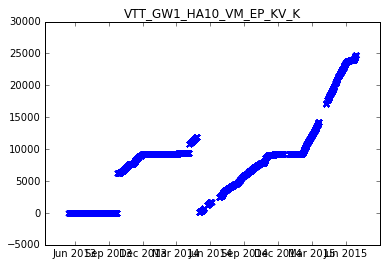

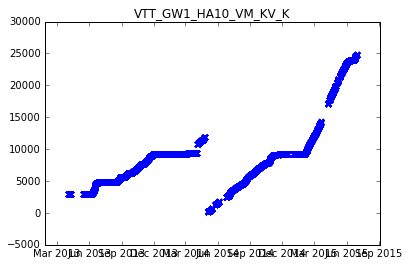

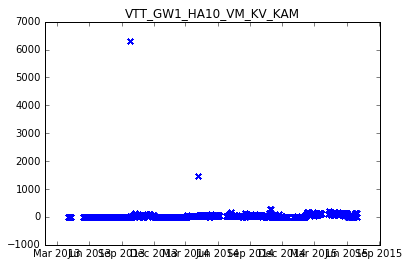

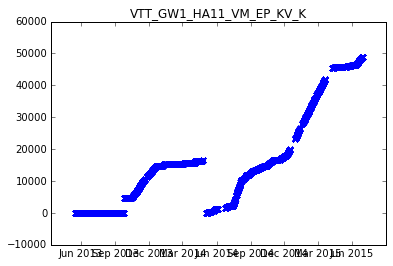

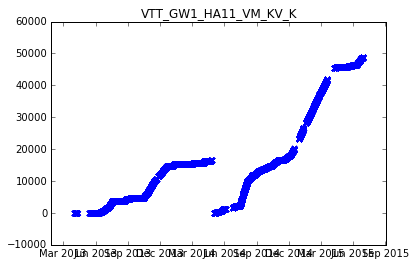

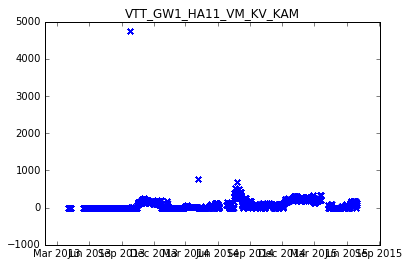

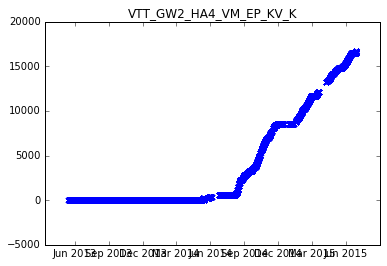

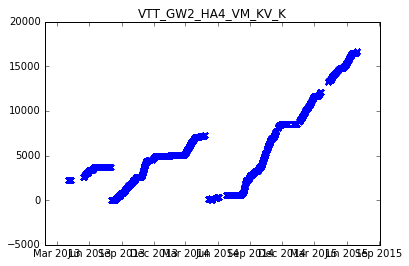

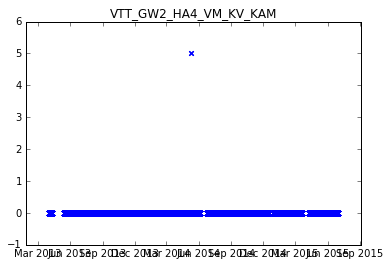

In [4]:
for file in file_list:
    Graph.Show.bin2graph(file)

---
* file_list 안의 file들을 
    * **Preprocess.data_preprocess(file)**를 통해 preprocess 과정을 거친 뒤, 
    * **FileIO.Save.preprocessed_data2bin_file(preprocessed_data)**를 통해 저장하자
        * 저장 경로는 GlobalParameter.Repository_Path와 GlobalParameter.Preprocessed_Path에 지정된 경로를 따른다 

In [5]:
for file in file_list:
    file_name = file.rsplit('/', 1)[-1]
    print 'preprocessing file name: ',
    print file_name + '\t', 
    
    start_time = time.time()
    _ = FileIO.Save.preprocessed_data2bin_file(Preprocess.data_preprocess(file))
    end_time = time.time()
    run_time = end_time - start_time
    print 'run_time: ' + str(run_time) + ' sec'

preprocessing file name:  VTT_GW1_HA10_VM_EP_KV_K.bin	run_time: 4.02908301353 sec
preprocessing file name:  VTT_GW1_HA10_VM_KV_K.bin	run_time: 6.41728305817 sec
preprocessing file name:  VTT_GW1_HA10_VM_KV_KAM.bin	run_time: 6.48311090469 sec
preprocessing file name:  VTT_GW1_HA11_VM_EP_KV_K.bin	run_time: 4.05844187737 sec
preprocessing file name:  VTT_GW1_HA11_VM_KV_K.bin	run_time: 6.54884004593 sec
preprocessing file name:  VTT_GW1_HA11_VM_KV_KAM.bin	run_time: 6.4818251133 sec
preprocessing file name:  VTT_GW2_HA4_VM_EP_KV_K.bin	run_time: 3.98062181473 sec
preprocessing file name:  VTT_GW2_HA4_VM_KV_K.bin	run_time: 6.46654605865 sec
preprocessing file name:  VTT_GW2_HA4_VM_KV_KAM.bin	run_time: 6.37528800964 sec


---
* 저장된 preprocessed_data를 불러오기 위해 지정된 경로를 확인해보자

In [6]:
preprocessed_file_path = os.path.join(GlobalParameter.Repository_Path, GlobalParameter.Preprocessed_Path)
preprocessed_file_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data'

---
* 지정된 경로 preprocessed_file_path에 저장되어있는 data들의 경로를 list로 만들어주자

In [7]:
preprocessed_file_list = FileIO.Load.load_filelist(preprocessed_file_path)
preprocessed_file_list

['/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA10_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW1_HA11_VM_KV_KAM.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_EP_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_KV_K.bin',
 '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/preprocessed_data/PP_VTT_GW2_HA4_VM_KV_KAM.bin']

---
* Preprocessing 후, preprocessed_file_list 안의 file들을 data를 graph를 통해 확인해보자 

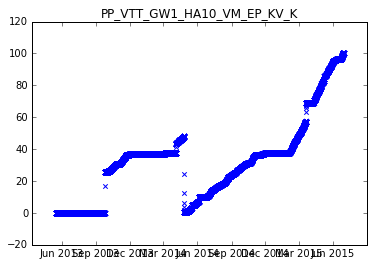

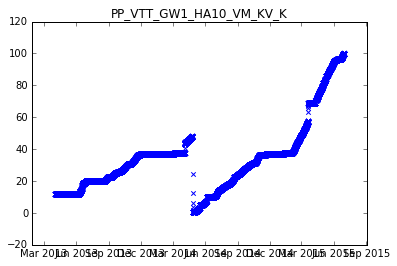

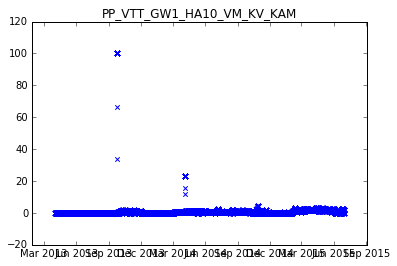

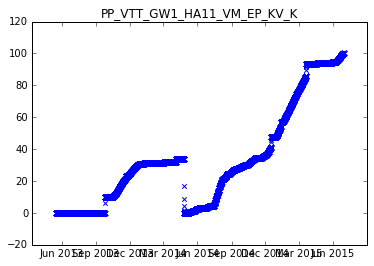

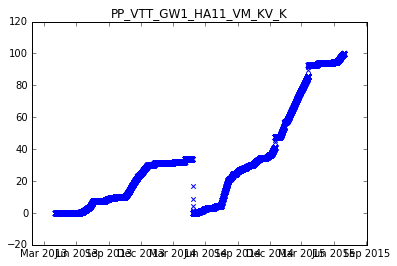

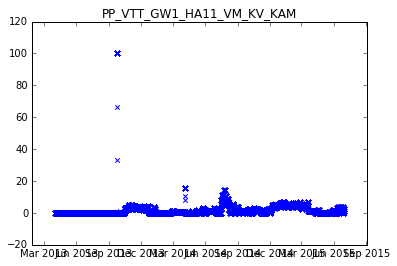

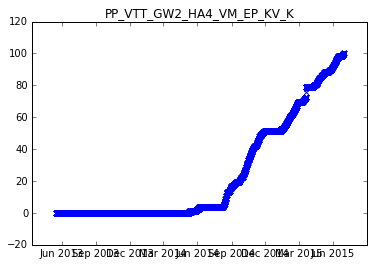

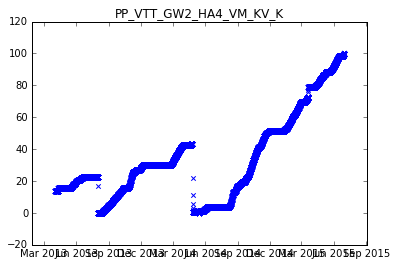

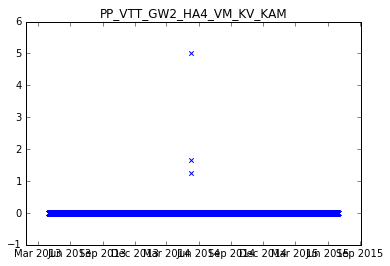

In [8]:
for file in preprocessed_file_list:
    Graph.Show.bin2graph(file)

---
##### 위 preprocessing & saving data 과정을 통해 아래와 같은 조건을 만족시켜 data를 분석하기 위한 준비과정을 완료하였음
* preprocessed data
* preprocessed data 를 저장하여, 분석 시 매번 preprocessing을 해야하는 문제 해결